**Heart failure prediction**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


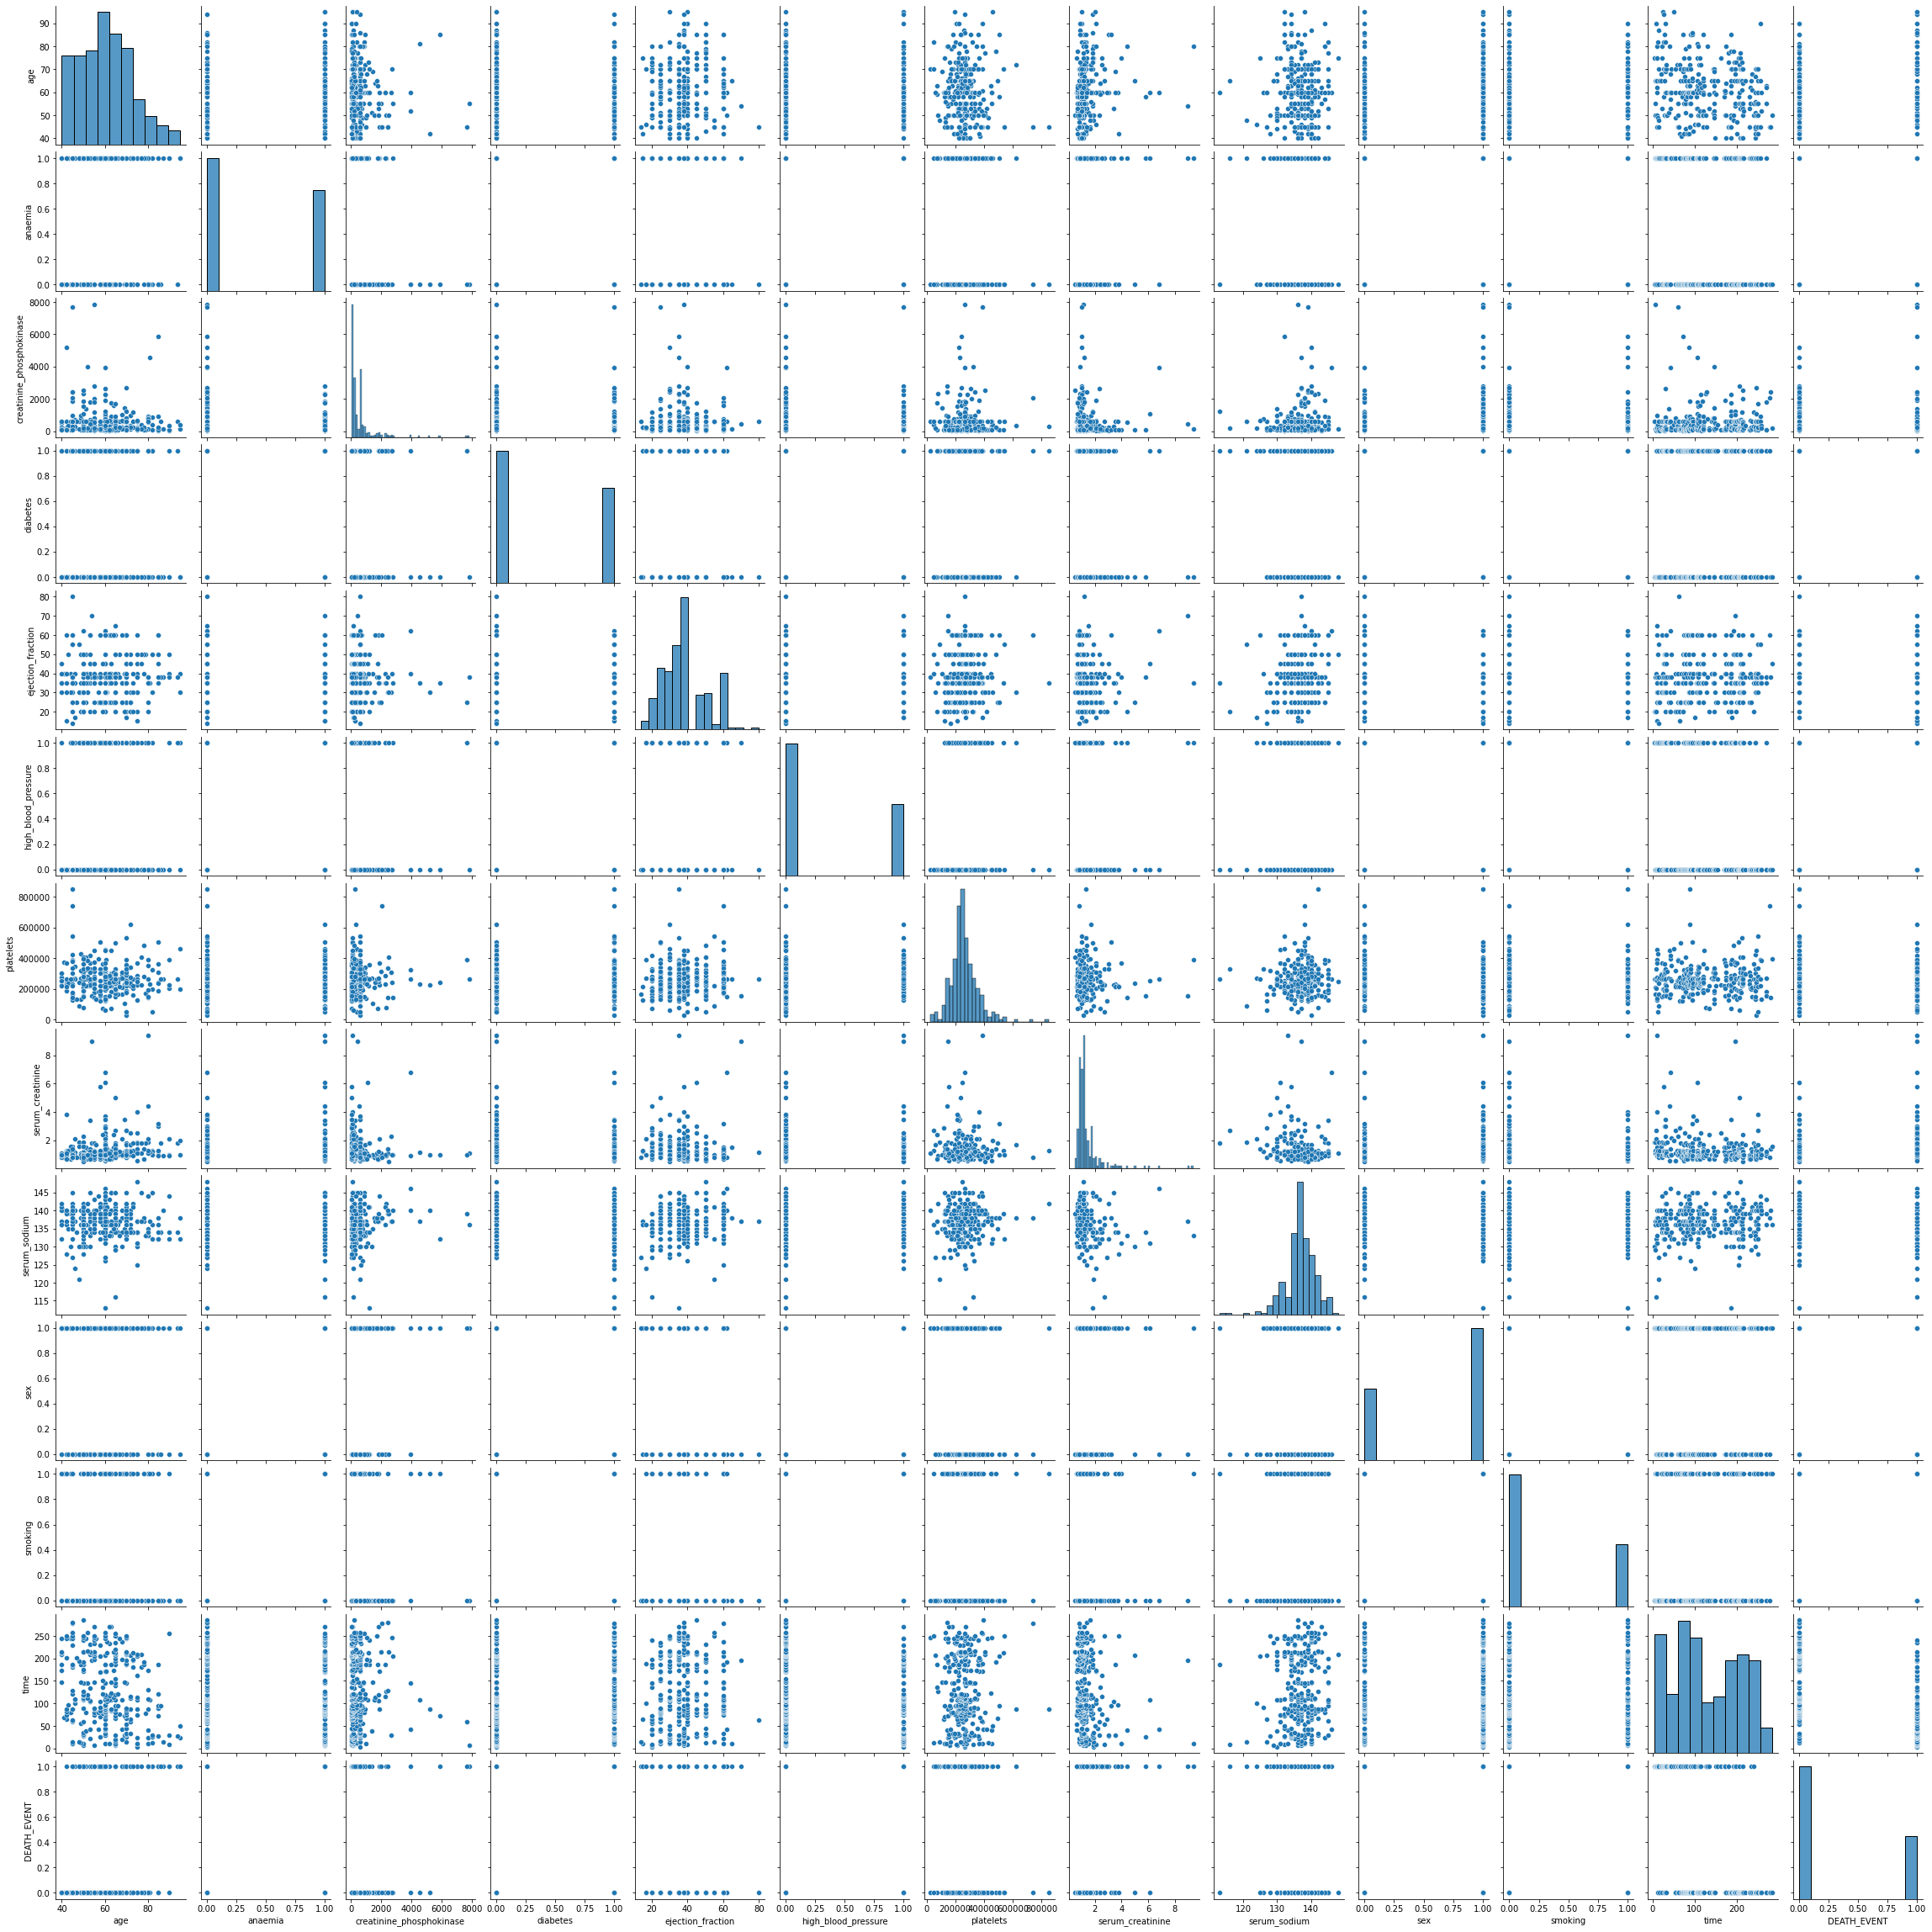

In [6]:
sns.pairplot(df);

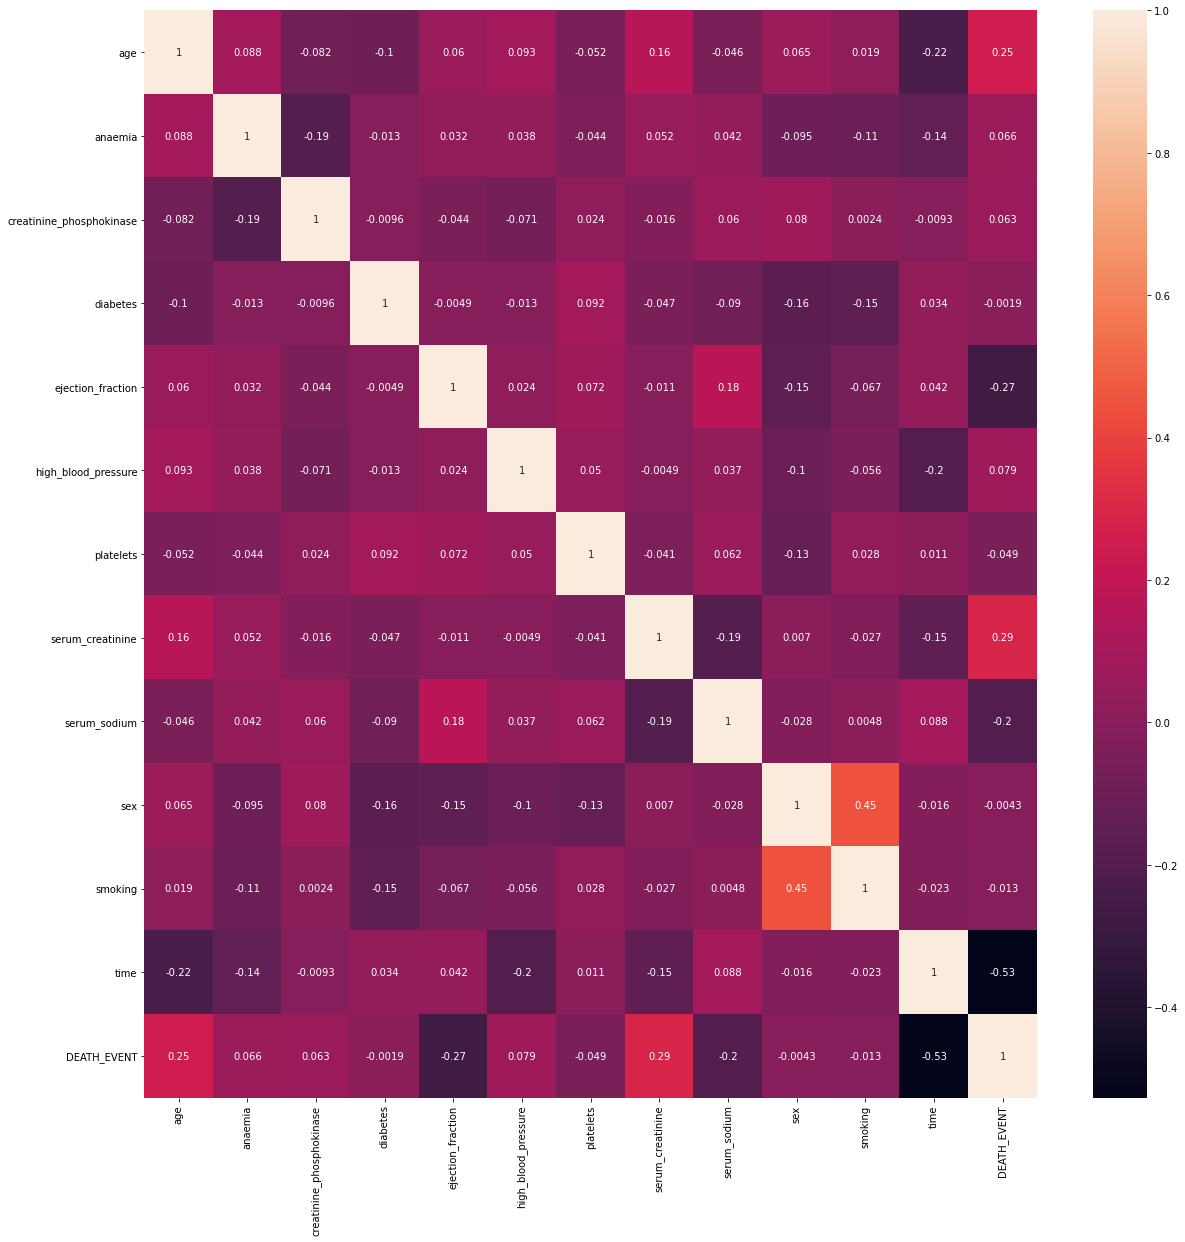

In [7]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,annot=True);

In [8]:
cat = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

In [9]:
df_cat = df[cat]
df_cat

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [10]:
df_num = df.drop(cat,axis = 1)
df_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


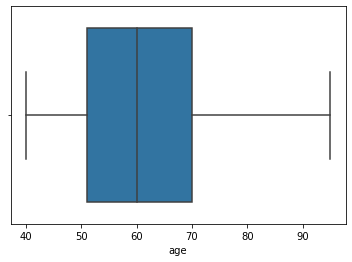

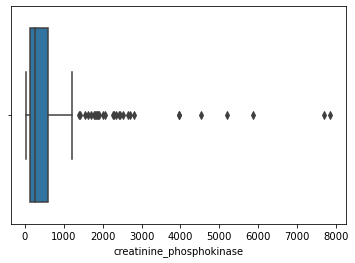

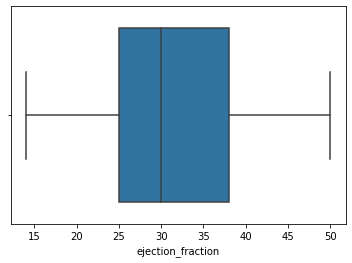

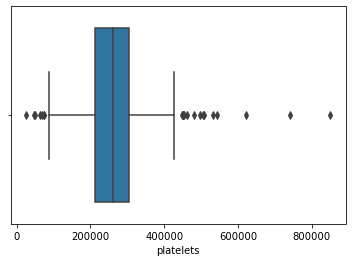

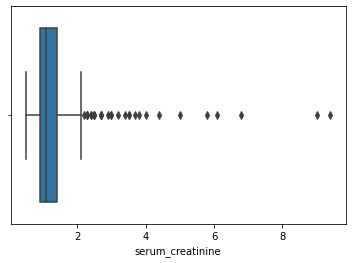

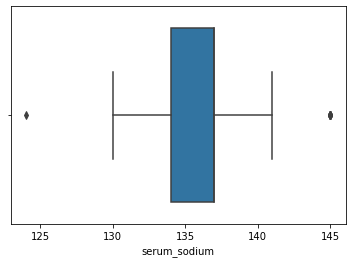

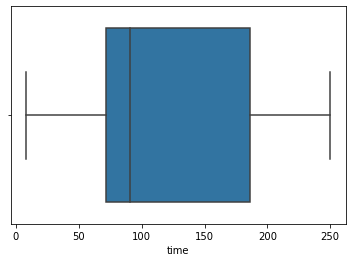

In [11]:
for i in df_num.columns:
    plt.subplots()
    sns.boxplot(data=df_num[i],x=df_num[i]);

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)
df_num = pd.DataFrame(scaled_data,columns=df_num.columns)
df_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879
...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509


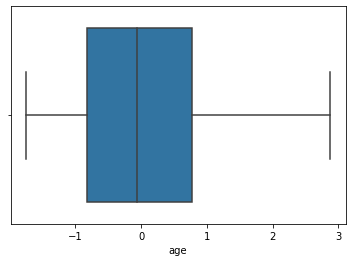

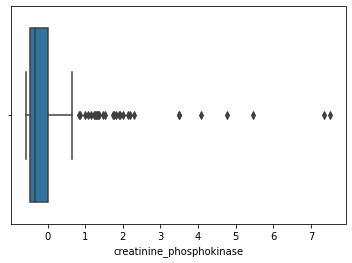

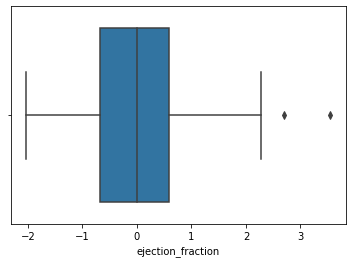

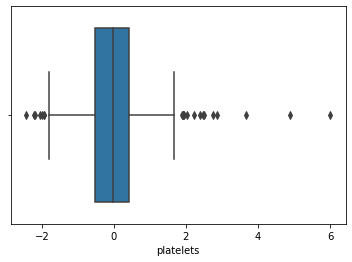

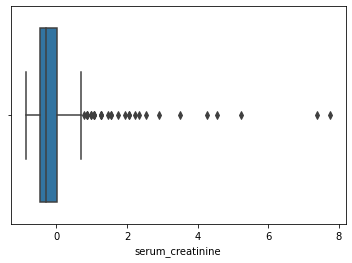

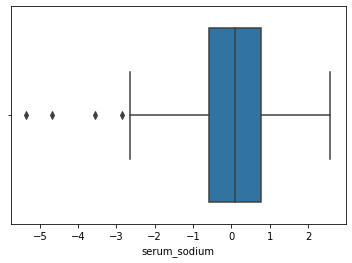

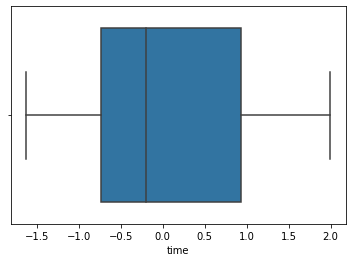

In [13]:
for i in df_num.columns:
    plt.subplots()
    sns.boxplot(data=df_num[i],x=df_num[i]);

In [14]:
cols = df_num.columns

In [15]:
df_num = df_num[df_num[cols]>=-3]
df_num = df_num[df_num[cols]<=3]

In [16]:
df_num.dropna(inplace=True)

In [17]:
df_num.shape

(280, 7)

In [18]:
df = df_num.merge(df_cat,how='left',left_index=True,right_index=True)
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.192945,0.000166,-1.530560,0.016816,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
2,0.350833,-0.449939,-1.530560,-1.038073,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.912335,-0.486071,-1.530560,-0.546474,0.490057,0.085034,-1.590785,1,0,0,1,0,1
5,2.456114,-0.552141,0.162199,-0.607924,0.683709,-1.050016,-1.577879,1,0,1,1,1,1
6,1.192945,-0.346704,-1.953749,-1.396531,-0.187726,0.085034,-1.552067,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.182411,-0.494330,-0.260991,-0.863965,-0.478205,-0.141976,1.803451,1,1,0,1,1,0
294,0.098199,-0.537688,-0.007077,-1.109765,-0.284552,1.447094,1.803451,0,1,1,1,1,0
295,-0.491279,1.278215,-0.007077,0.068025,-0.187726,0.539054,1.816357,0,0,0,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389,0.005926,0.766064,1.932509,0,0,0,1,1,0


**MinMax Scaler**

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [20]:
df = pd.DataFrame(scaled_data,columns=df.columns)
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.636364,0.201732,0.117647,0.463217,0.358974,0.250000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0
1,0.454545,0.044388,0.117647,0.264337,0.205128,0.208333,0.010676,0.0,0.0,0.0,1.0,1.0,1.0
2,0.181818,0.031757,0.117647,0.357019,0.358974,0.541667,0.010676,1.0,0.0,0.0,1.0,0.0,1.0
3,0.909091,0.008661,0.509804,0.345433,0.410256,0.333333,0.014235,1.0,0.0,1.0,1.0,1.0,1.0
4,0.636364,0.080476,0.019608,0.196756,0.179487,0.541667,0.021352,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.418182,0.028870,0.411765,0.297162,0.102564,0.500000,0.946619,1.0,1.0,0.0,1.0,1.0,0.0
276,0.400000,0.013713,0.470588,0.250821,0.153846,0.791667,0.946619,0.0,1.0,1.0,1.0,1.0,0.0
277,0.272727,0.648502,0.470588,0.472871,0.179487,0.625000,0.950178,0.0,0.0,0.0,0.0,0.0,0.0
278,0.090909,0.862505,0.470588,0.221858,0.230769,0.666667,0.982206,0.0,0.0,0.0,1.0,1.0,0.0


**Predictor and target**

In [21]:
X = np.asarray(df.drop('DEATH_EVENT',axis=1))
y = np.asarray(df['DEATH_EVENT'])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

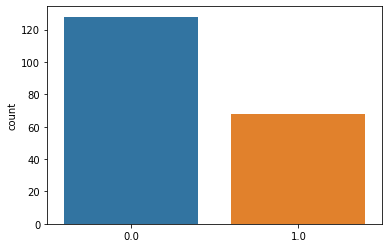

In [23]:
sns.countplot(x=y_train);

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

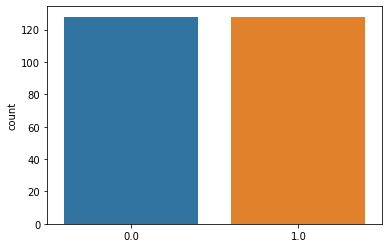

In [25]:
sns.countplot(x=y_train);

**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8125

In [27]:
clf.score(X_test,y_test)

0.7857142857142857

**SVM**

In [28]:
from sklearn import svm

clf1 = svm.SVC()
clf1.fit(X_train,y_train)
clf1.score(X_train,y_train)

0.91015625

In [29]:
clf1.score(X_test,y_test)

0.7857142857142857

**MLP Classifier**

In [30]:
from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(hidden_layer_sizes=(50,25,2),max_iter=10000)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

1.0

In [31]:
clf2.score(X_test,y_test)

0.7976190476190477

**Decision Tree Classifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier()
clf3.fit(X_train,y_train)
clf3.score(X_train,y_train)

1.0

In [33]:
clf3.score(X_test,y_test)

0.7857142857142857

**Metrics**

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

classifiers = [clf,clf1,clf2,clf3]

for i in classifiers:
    accuracy = accuracy_score(y_test,i.predict(X_test))
    balanced_accuracy = balanced_accuracy_score(y_test,i.predict(X_test))
    f1 = f1_score(y_test,i.predict(X_test))
    recall = recall_score(y_test,i.predict(X_test))

    print('Classifier=',i,'\nAccuracy:',accuracy,'\nBalanced Accuracy:',balanced_accuracy,'\nF1:',f1,'\nRecall:',recall,'\n')

Classifier= LogisticRegression(n_jobs=-1) 
Accuracy: 0.7857142857142857 
Balanced Accuracy: 0.8232323232323232 
F1: 0.64 
Recall: 0.8888888888888888 

Classifier= SVC() 
Accuracy: 0.7857142857142857 
Balanced Accuracy: 0.8232323232323232 
F1: 0.64 
Recall: 0.8888888888888888 

Classifier= MLPClassifier(hidden_layer_sizes=(50, 25, 2), max_iter=10000) 
Accuracy: 0.7976190476190477 
Balanced Accuracy: 0.8106060606060606 
F1: 0.6382978723404256 
Recall: 0.8333333333333334 

Classifier= DecisionTreeClassifier() 
Accuracy: 0.7857142857142857 
Balanced Accuracy: 0.803030303030303 
F1: 0.625 
Recall: 0.8333333333333334 

